# CASE STUDY 1

**CONNECTING COLAB WITH GIHUB TO FETCH THE DATA.**

In [ ]:
!git clone https://github.com/utkarshraaz/DataScience.git


fatal: destination path 'DataScience' already exists and is not an empty directory.


**Always great idea to read about the business** 
- Campaign in this case on wikipedia.
- Understanding the business will help you finding problems by yourself.  

**Business requirement**
- Deploy to production? - check the infrastructure.
- live results expected? - Model should be simple if volume is huge.
- EDA

**1- IMPORTING USEFUL LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

**READING DATA USING PANDAS**

In [ ]:
town= pd.read_csv('/content/DataScience/census_town_data_at_district_level_Explorin.csv')
print(town.shape)
town.head()

(638, 51)


,state_code,state_name,district_code,district_name,total_households,total_population,total_population_male,total_population_female,total_population_sc,total_population_male_sc,total_population_female_sc,total_population_st,total_population_male_st,total_population_female_st,area_km,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_degree_college,pvt_art_degree_college,govt_science_college,pvt_science_college,govt_commerce_college,pvt_commerce_college,govt_art_science_degree_college,pvt_art_science_degree_college,govt_art_commerce_degree_college,pvt_art_commerce_degree_college,govt_art_science_commerce_degree_college,pvt_art_science_commerce_degree_college,govt_law_degree_college,pvt_law_degree_college,govt_university,pvt_university,govt_other_degree_college,pvt_other_degree_college,govt_medical_college,pvt_medical_college,govt_engineering_college,pvt_engineering_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_disabled_school,pvt_disabled_school
0,1,jammu & kashmir,0,towns are spread over in more then one district.,204812.0,1357011,709542.0,647469.0,999.0,926.0,73.0,6743.0,3865.0,2878.0,316.31,243.0,72.0,242.0,239.0,65.0,203.0,34.0,32.0,11.0,2.0,10.0,2.0,10.0,2.0,10.0,2.0,10.0,2.0,10.0,2.0,3.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
1,1,jammu & kashmir,1,kupwara,11999.0,104729,62152.0,42577.0,176.0,176.0,0.0,1861.0,1058.0,803.0,47.34,137.0,29.0,100.0,15.0,28.0,10.0,14.0,10.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,jammu & kashmir,2,badgam,10743.0,78360,44768.0,33592.0,282.0,265.0,17.0,203.0,150.0,53.0,43.68,45.0,18.0,30.0,19.0,13.0,9.0,13.0,5.0,5.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,jammu & kashmir,3,leh (ladakh),7004.0,45671,30560.0,15111.0,380.0,355.0,25.0,22068.0,11225.0,10843.0,24.01,7.0,6.0,8.0,5.0,6.0,5.0,7.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,jammu & kashmir,4,kargil,2191.0,16338,10082.0,6256.0,8.0,7.0,1.0,11496.0,5959.0,5537.0,2.14,8.0,7.0,8.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
## let's check the number of districts in india as per Census 2011

print(town.district_code.nunique()) ## not it is roughly 750 as per latest data (in 2001, it was ~595)

town[town["district_name"]=="gurgaon"]

636


,state_code,state_name,district_code,district_name,total_households,total_population,total_population_male,total_population_female,total_population_sc,total_population_male_sc,total_population_female_sc,total_population_st,total_population_male_st,total_population_female_st,area_km,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_degree_college,pvt_art_degree_college,govt_science_college,pvt_science_college,govt_commerce_college,pvt_commerce_college,govt_art_science_degree_college,pvt_art_science_degree_college,govt_art_commerce_degree_college,pvt_art_commerce_degree_college,govt_art_science_commerce_degree_college,pvt_art_science_commerce_degree_college,govt_law_degree_college,pvt_law_degree_college,govt_university,pvt_university,govt_other_degree_college,pvt_other_degree_college,govt_medical_college,pvt_medical_college,govt_engineering_college,pvt_engineering_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_disabled_school,pvt_disabled_school
84,6,haryana,86,gurgaon,237750.0,1042253,565228.0,477025.0,107824.0,57083.0,50741.0,0.0,0.0,0.0,281.35,122.0,173.0,64.0,155.0,47.0,102.0,35.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,1.0,0.0,2.0,1.0


In [ ]:
village= pd.read_csv('/content/DataScience/census_village_data_at_district_level_Explorin.csv')
print(village.shape)
print(village.district_code.nunique())
village.head()

(631, 43)
631


,state_code,state_name,district_code,district_name,total_households,total_population,total_population_male,total_population_female,total_population_SC,total_population_male_SC,total_population_female_SC,total_population_ST,total_population_male_ST,total_population_female_ST,area_hectare,govt_pre_primary_school_UKG,pvt_pre_primary_school_UKG,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_science_degree_college,pvt_art_science_degree_college,govt_engineering_college,pvt_engineering_college,govt_medicine_college,pvt_medicine_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_vocational_ITI_training,pvt_vocational_ITI_training,govt_non_formal_training_centre,pvt_non_formal_training_centre,govt_disabled_school,pvt_disabled_school,govt_other_education,pvt_other_education
0,1.0,JAMMU & KASHMIR,1.0,Kupwara,101930.0,765625.0,412038.0,353587.0,872.0,870.0,2.0,68491.0,35855.0,32636.0,61595.37,0.0,408.0,892.0,96.0,642.0,68.0,83.0,12.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,JAMMU & KASHMIR,2.0,Badgam,89417.0,655833.0,343385.0,312448.0,86.0,78.0,8.0,23293.0,12025.0,11268.0,67281.01,0.0,485.0,651.0,99.0,409.0,71.0,84.0,14.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,JAMMU & KASHMIR,3.0,Leh(Ladakh),14905.0,87816.0,48411.0,39405.0,108.0,89.0,19.0,73789.0,36318.0,37471.0,36988.50,0.0,108.0,233.0,10.0,107.0,7.0,34.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,222.0
3,1.0,JAMMU & KASHMIR,4.0,Kargil,16147.0,124464.0,67703.0,56761.0,10.0,5.0,5.0,110840.0,56693.0,54147.0,18661.81,0.0,126.0,268.0,32.0,190.0,18.0,40.0,8.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,246.0
4,1.0,JAMMU & KASHMIR,5.0,Punch,83045.0,438205.0,229774.0,208431.0,278.0,248.0,30.0,171011.0,87542.0,83469.0,112557.00,0.0,204.0,694.0,52.0,326.0,34.0,63.0,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
village[village["district_name"]=="Gurgaon"]

,state_code,state_name,district_code,district_name,total_households,total_population,total_population_male,total_population_female,total_population_SC,total_population_male_SC,total_population_female_SC,total_population_ST,total_population_male_ST,total_population_female_ST,area_hectare,govt_pre_primary_school_UKG,pvt_pre_primary_school_UKG,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_science_degree_college,pvt_art_science_degree_college,govt_engineering_college,pvt_engineering_college,govt_medicine_college,pvt_medicine_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_vocational_ITI_training,pvt_vocational_ITI_training,govt_non_formal_training_centre,pvt_non_formal_training_centre,govt_disabled_school,pvt_disabled_school,govt_other_education,pvt_other_education
85,6.0,HARYANA,86.0,Gurgaon,88678.0,472179.0,251462.0,220717.0,90113.0,47249.0,42864.0,0.0,0.0,0.0,97858.0,0.0,132.0,246.0,127.0,144.0,96.0,80.0,79.0,36.0,45.0,2.0,0.0,0.0,7.0,0.0,1.0,0.0,5.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0


**Data is always messy in real scenario**
- TYPES OF INFORMATION STORED IN DATA, ITS COUNT AND DATA TYPE

In [ ]:
village.info() # you can optimize your space 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   state_code                       631 non-null    float64
 1   state_name                       631 non-null    object 
 2   district_code                    631 non-null    float64
 3   district_name                    631 non-null    object 
 4   total_households                 631 non-null    float64
 5   total_population                 631 non-null    float64
 6   total_population_male            631 non-null    float64
 7   total_population_female          631 non-null    float64
 8   total_population_SC              631 non-null    float64
 9   total_population_male_SC         631 non-null    float64
 10  total_population_female_SC       631 non-null    float64
 11  total_population_ST              631 non-null    float64
 12  total_population_male_

**CHECKING FOR NULL DATA**

In [ ]:
village.isnull().sum()

state_code                         0
state_name                         0
district_code                      0
district_name                      0
total_households                   0
total_population                   0
total_population_male              0
total_population_female            0
total_population_SC                0
total_population_male_SC           0
total_population_female_SC         0
total_population_ST                0
total_population_male_ST           0
total_population_female_ST         0
area_hectare                       0
govt_pre_primary_school_UKG        0
pvt_pre_primary_school_UKG         0
govt_primary_school                0
pvt_primary_school                 0
govt_middle_school                 0
pvt_middle_school                  0
govt_secondary_school              0
pvt_secondary_school               0
govt_senior_secondary_school       0
pvt_senior_secondary_school        0
govt_art_science_degree_college    0
pvt_art_science_degree_college     0
g

**STATISTICS SUMMARY OF EACH COLUMN**
- Helps to find out outlier 
- Understand business at first glance

In [ ]:
village.describe()

,state_code,district_code,total_households,total_population,total_population_male,total_population_female,total_population_SC,total_population_male_SC,total_population_female_SC,total_population_ST,total_population_male_ST,total_population_female_ST,area_hectare,govt_pre_primary_school_UKG,pvt_pre_primary_school_UKG,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_science_degree_college,pvt_art_science_degree_college,govt_engineering_college,pvt_engineering_college,govt_medicine_college,pvt_medicine_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_vocational_ITI_training,pvt_vocational_ITI_training,govt_non_formal_training_centre,pvt_non_formal_training_centre,govt_disabled_school,pvt_disabled_school,govt_other_education,pvt_other_education
count,631.000000,631.000000,6.310000e+02,6.310000e+02,6.310000e+02,6.310000e+02,6.310000e+02,6.310000e+02,6.310000e+02,6.310000e+02,631.000000,631.000000,6.310000e+02,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,17.015848,318.768621,2.671612e+05,1.321227e+06,6.779048e+05,6.433367e+05,2.438066e+05,1.253785e+05,1.184281e+05,1.491011e+05,74902.049128,74199.007924,4.042600e+05,340.337559,191.645008,1133.358162,181.145800,466.364501,111.388273,156.126783,64.377179,57.808241,29.209192,6.187005,5.982567,0.580032,2.619651,0.483360,0.616482,0.714739,1.553090,1.342314,1.543582,4.045959,3.749604,34.161648,1.855784,2.424723,0.868463,11.388273,12.247227
std,9.379972,184.038886,2.074055e+05,1.014049e+06,5.220467e+05,4.927729e+05,2.563607e+05,1.320712e+05,1.244185e+05,2.338053e+05,116945.454110,116894.106863,3.791609e+05,854.865086,216.988532,856.539977,188.848148,332.885800,135.396782,151.318081,84.010961,59.551282,42.470202,10.332867,9.474009,1.846364,6.358436,2.035235,1.741733,3.770111,3.929532,4.843923,3.135701,8.595649,6.504753,132.517274,6.399141,24.715787,2.578323,48.484949,87.398916
min,1.000000,1.000000,8.750000e+02,3.530000e+03,1.861000e+03,1.669000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,160.500000,1.229805e+05,5.974365e+05,3.125375e+05,2.904735e+05,5.736400e+04,2.909800e+04,2.823650e+04,4.309500e+03,2223.500000,2101.500000,1.773431e+05,0.000000,44.500000,506.000000,64.000000,204.500000,32.000000,59.000000,16.000000,21.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,318.000000,2.270580e+05,1.082605e+06,5.549540e+05,5.302320e+05,1.756900e+05,9.091200e+04,8.663000e+04,5.363600e+04,27092.000000,25900.000000,3.173877e+05,2.000000,128.000000,972.000000,123.000000,433.000000,73.000000,108.000000,40.000000,42.000000,15.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,476.500000,3.551535e+05,1.737448e+06,8.928930e+05,8.410845e+05,3.415210e+05,1.776545e+05,1.643065e+05,1.983885e+05,99376.000000,98288.500000,5.128128e+05,158.000000,252.500000,1557.500000,226.000000,670.500000,135.000000,200.500000,79.000000,73.000000,36.000000,7.000000,8.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,5.000000,5.000000,8.000000,1.000000,1.000000,0.000000,3.

**OUTLIER TREATMENT**



---
VILLAGE HAVING MORE THAN 4500 PRE PRIMARY SCHOOLS SEEMS ODD.


In [ ]:
pre_primary = village.index[village['govt_pre_primary_school_UKG'] > 4500].tolist()
pre_primary

[340, 512]


VILLAGE HAVING MORE THAN 4500 GOVT PRIMARY SCHOOLS SEEMS ODD.


In [ ]:
primary = village.index[village['govt_primary_school'] > 4500].tolist()
primary

[340, 547]

We know that Alampur is a smallest village located in Fatehgarh Sahib district, Punjab in India with area of 100 hectare. But according to our data least area is 0 hectare which seems an outlier. Let's find out those villages

In [ ]:
area = village.index[village['area_hectare'] <100 ].tolist() # perfect example of understanding business.. 
print(area)

[92, 242, 244, 246, 249, 251, 254, 255, 256, 257, 258, 259, 263, 264, 265, 266, 268, 269, 270, 271, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 290, 291, 292, 293, 294, 295, 296]


In [ ]:
outlier = village.iloc[[92, 242, 244, 246, 249, 251, 254, 255, 256, 257, 258, 259, 
                       263, 264, 265, 266, 268, 269, 270, 271, 276, 277, 278, 279, 
                       280, 281, 282, 283, 284, 285, 290, 291, 292, 293, 294, 295,
                       296]]

In [ ]:
outlier.head()

,state_code,state_name,district_code,district_name,total_households,total_population,total_population_male,total_population_female,total_population_SC,total_population_male_SC,total_population_female_SC,total_population_ST,total_population_male_ST,total_population_female_ST,area_hectare,govt_pre_primary_school_UKG,pvt_pre_primary_school_UKG,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_science_degree_college,pvt_art_science_degree_college,govt_engineering_college,pvt_engineering_college,govt_medicine_college,pvt_medicine_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_vocational_ITI_training,pvt_vocational_ITI_training,govt_non_formal_training_centre,pvt_non_formal_training_centre,govt_disabled_school,pvt_disabled_school,govt_other_education,pvt_other_education
92,7.0,NCT OF DELHI,93.0,East,875.0,3530.0,1861.0,1669.0,57.0,23.0,34.0,0.0,0.0,0.0,26.7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,12.0,Arunachal Pradesh,245.0,Tawang,8377.0,38775.0,20792.0,17983.0,0.0,0.0,0.0,31105.0,15024.0,16081.0,1.0,78.0,3.0,106.0,7.0,50.0,4.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
244,12.0,Arunachal Pradesh,247.0,East Kameng,10898.0,60340.0,29506.0,30834.0,0.0,0.0,0.0,57797.0,28146.0,29651.0,0.0,94.0,42.0,188.0,41.0,40.0,11.0,9.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,12.0,Arunachal Pradesh,249.0,Upper Subansiri,13231.0,70043.0,34840.0,35203.0,0.0,0.0,0.0,67960.0,33550.0,34410.0,0.0,218.0,4.0,160.0,4.0,64.0,4.0,11.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249,12.0,Arunachal Pradesh,252.0,Upper Siang,5729.0,28780.0,15335.0,13445.0,0.0,0.0,0.0,24498.0,12492.0,12006.0,0.0,83.0,5.0,68.0,5.0,23.0,2.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Could you imagine these district with such a **small area has such a high number of primary schools?**?


In [ ]:
%matplotlib inline

<BarContainer object of 37 artists>

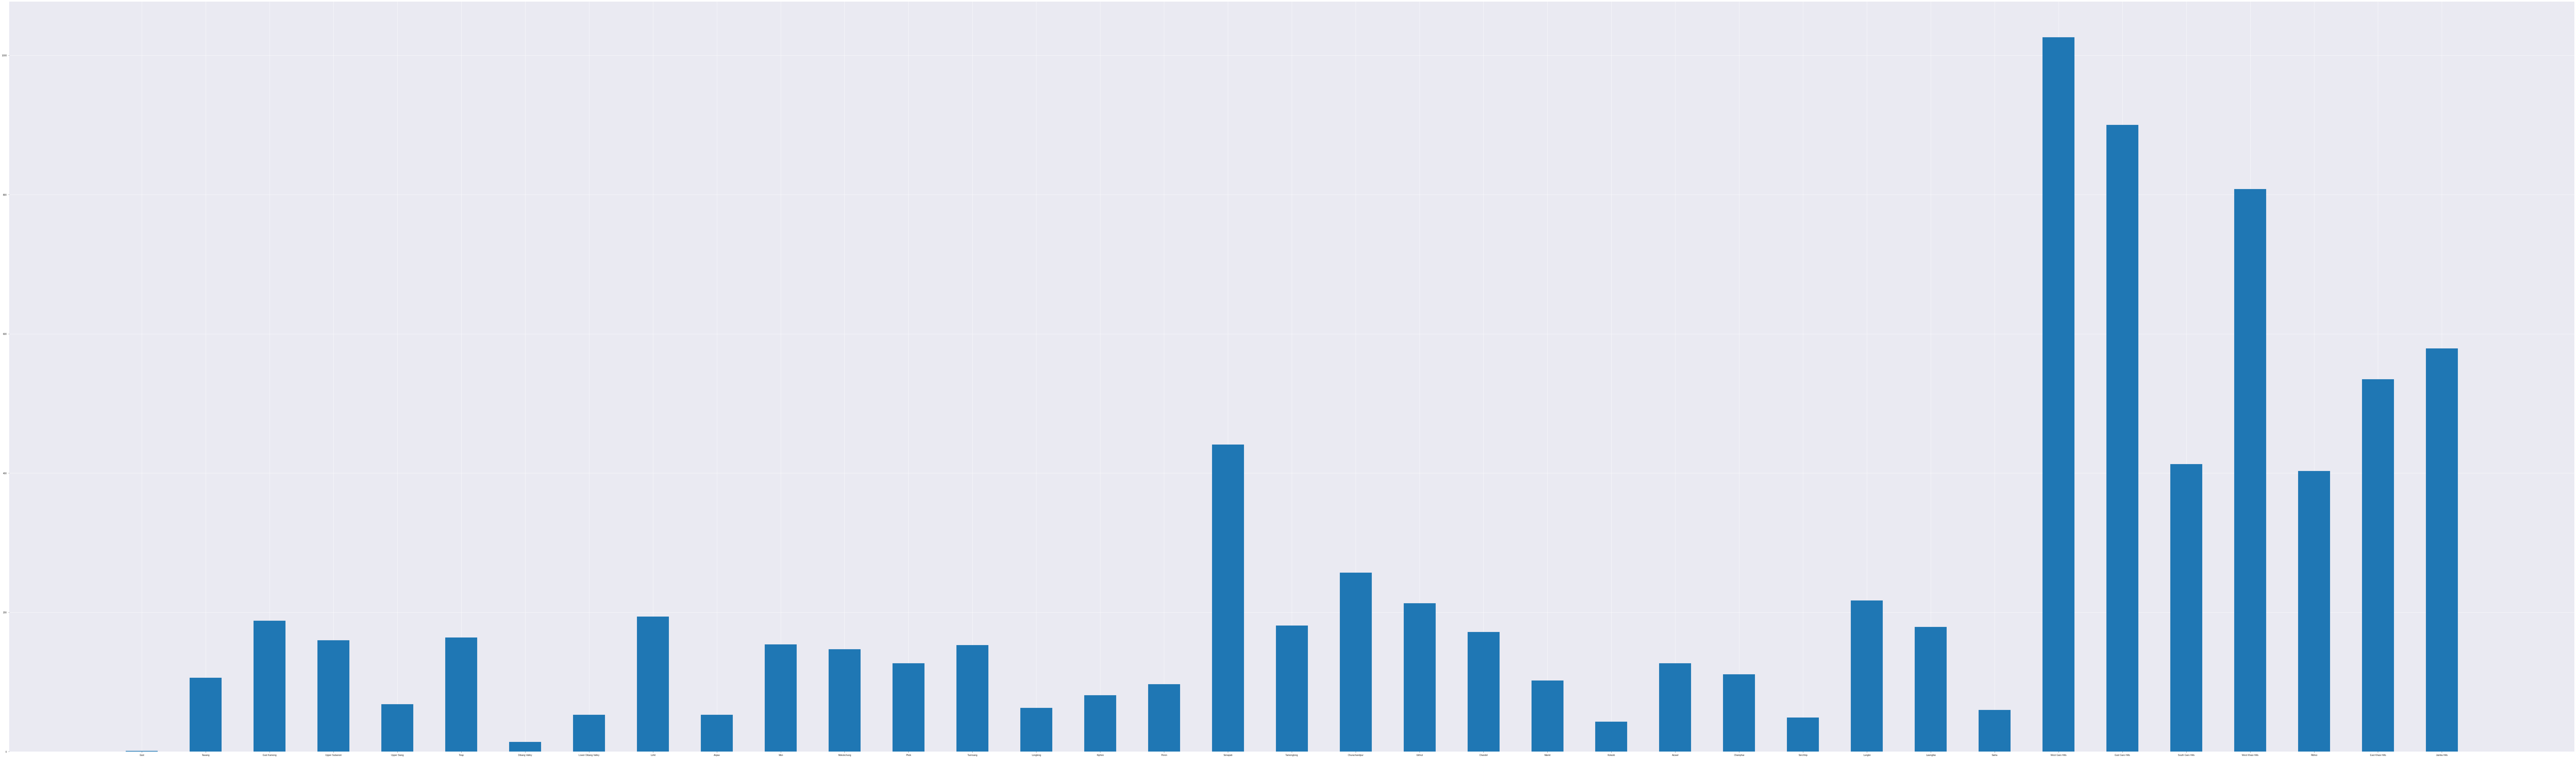

In [ ]:
ax= plt.subplots(figsize=(200,60))
plt.bar(outlier.district_name,outlier.govt_primary_school, width=0.5)

Dropping the outliers.

In [ ]:
index = [92, 242, 244, 246, 249, 251, 254, 255, 256, 257, 258, 259, 
                       263, 264, 265, 266, 268, 269, 270, 271, 276, 277, 278, 279, 
                       280, 281, 282, 283, 284, 285, 290, 291, 292, 293, 294, 295,
                       296,340,512,547]
village_WO= village.drop(index)

NOW OUR DATA IS GOOD TO GO FOR FURTHER ANALYSIS

In [ ]:
village_WO.describe()

,state_code,district_code,total_households,total_population,total_population_male,total_population_female,total_population_SC,total_population_male_SC,total_population_female_SC,total_population_ST,total_population_male_ST,total_population_female_ST,area_hectare,govt_pre_primary_school_UKG,pvt_pre_primary_school_UKG,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_science_degree_college,pvt_art_science_degree_college,govt_engineering_college,pvt_engineering_college,govt_medicine_college,pvt_medicine_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_vocational_ITI_training,pvt_vocational_ITI_training,govt_non_formal_training_centre,pvt_non_formal_training_centre,govt_disabled_school,pvt_disabled_school,govt_other_education,pvt_other_education
count,591.000000,591.000000,5.910000e+02,5.910000e+02,5.910000e+02,5.910000e+02,5.910000e+02,5.910000e+02,5.910000e+02,5.910000e+02,591.000000,591.000000,5.910000e+02,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,17.170897,321.091371,2.792651e+05,1.381914e+06,7.091635e+05,6.727667e+05,2.570476e+05,1.322223e+05,1.248253e+05,1.469731e+05,73809.869712,73163.238579,4.255839e+05,333.504230,196.260575,1170.120135,186.923858,486.382403,115.653130,162.140440,67.155668,60.526227,30.813875,6.472081,6.289340,0.598985,2.729272,0.492386,0.644670,0.747885,1.605753,1.411168,1.629442,4.077834,3.972927,36.191201,1.937394,2.509306,0.896785,11.622673,12.705584
std,9.626388,189.149717,2.003790e+05,9.840304e+05,5.070121e+05,4.778572e+05,2.548518e+05,1.313851e+05,1.236025e+05,2.322327e+05,116088.981216,116178.641654,3.732856e+05,825.299389,215.947184,803.916161,189.414269,324.494808,137.583219,148.511275,85.633489,58.799795,43.337844,10.489162,9.644663,1.876690,6.471408,2.035164,1.766631,3.882912,3.958073,4.980825,3.207472,7.709385,6.648253,136.614994,6.543814,25.490367,2.570598,48.450969,89.942908
min,1.000000,1.000000,1.170000e+03,6.420000e+03,3.355000e+03,3.065000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,4.470000e+02,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,151.500000,1.401430e+05,6.914965e+05,3.624080e+05,3.377615e+05,7.844650e+04,3.969450e+04,3.883450e+04,3.307000e+03,1653.500000,1581.500000,2.015236e+05,0.000000,52.000000,589.000000,70.000000,251.000000,37.000000,68.000000,19.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,335.000000,2.377020e+05,1.148512e+06,5.955830e+05,5.555950e+05,1.903730e+05,9.976100e+04,9.364400e+04,4.866800e+04,24970.000000,23975.000000,3.365248e+05,0.000000,133.000000,1003.000000,130.000000,450.000000,76.000000,116.000000,42.000000,45.000000,17.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,484.500000,3.606730e+05,1.774228e+06,9.145400e+05,8.637225e+05,3.520170e+05,1.828910e+05,1.701615e+05,1.974995e+05,98583.000000,97561.500000,5.346112e+05,151.500000,254.000000,1578.500000,231.500000,687.000000,138.500000,208.000000,81.500000,75.500000,39.000000,8.000000,8.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,5.000000,5.000000,9.500000,1.000000,1.000000,1.000000,3

OUR AIM IS TO FIND 10 DISTRICTS FOR BETI BACHAO BETI PADHAO COMPAIGN.

Factor considered in decision making:

**SEX RATIO**

Lets calculate the sex ratio and analyse it.....

In [ ]:
sex_ratio= village_WO.total_population_female/village_WO.total_population_male
sex_ratio.describe(). 

count    591.000000
mean       0.950087
std        0.058883
min        0.690437
25%        0.909556
50%        0.952418
75%        0.986269
max        1.176695
dtype: float64

Plotting the ratio vs villages

<BarContainer object of 591 artists>

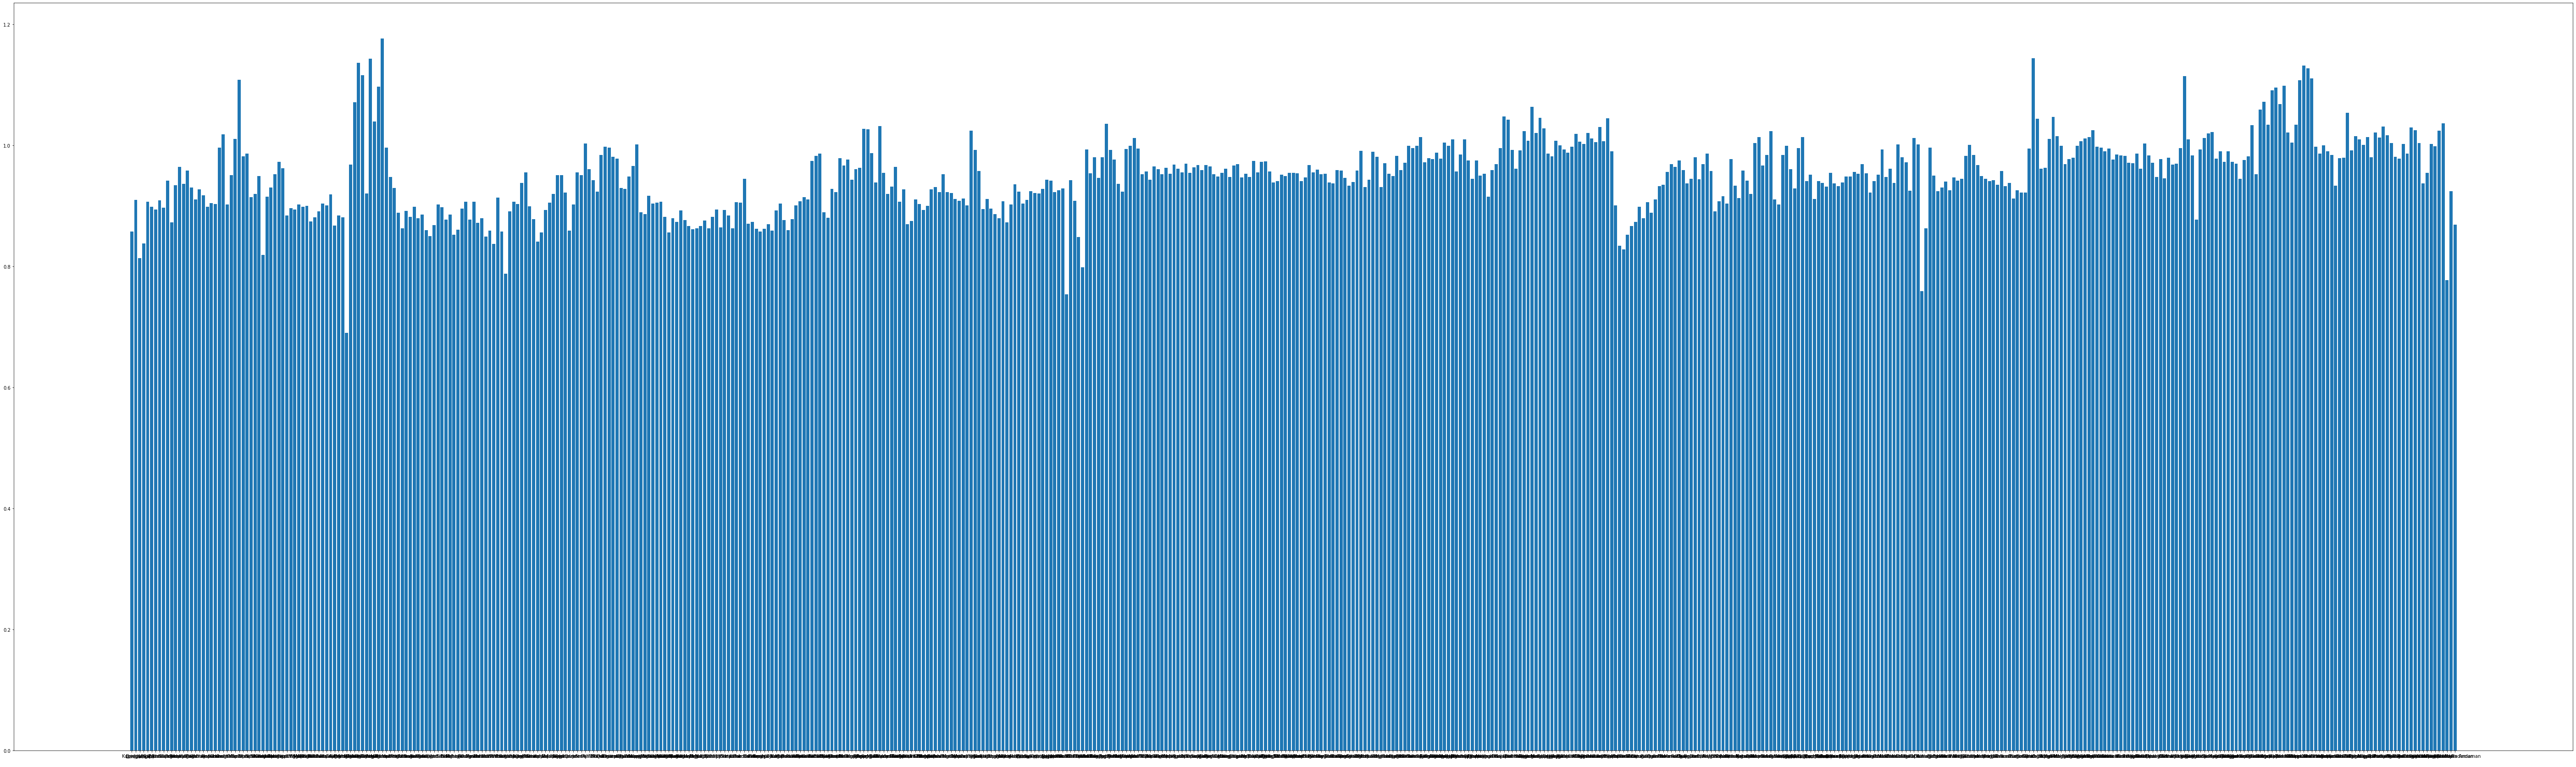

In [ ]:
ax= plt.subplots(figsize=(100,30))
plt.bar(village_WO.district_name,sex_ratio)

From graph we can observe most of the villages are havng ratio more than 0.85. Let's see how many of them is less than that...

In [ ]:
village_with_less_ratio = sex_ratio.index[sex_ratio <= 0.85].tolist()
village_with_less_ratio

[2, 3, 33, 54, 75, 89, 91, 95, 103, 238, 241, 243, 415, 416, 491, 628]

In [ ]:
village_with_less_ratio=village.iloc[village_with_less_ratio]
village_with_less_ratio.head(12)

,state_code,state_name,district_code,district_name,total_households,total_population,total_population_male,total_population_female,total_population_SC,total_population_male_SC,total_population_female_SC,total_population_ST,total_population_male_ST,total_population_female_ST,area_hectare,govt_pre_primary_school_UKG,pvt_pre_primary_school_UKG,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_science_degree_college,pvt_art_science_degree_college,govt_engineering_college,pvt_engineering_college,govt_medicine_college,pvt_medicine_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_vocational_ITI_training,pvt_vocational_ITI_training,govt_non_formal_training_centre,pvt_non_formal_training_centre,govt_disabled_school,pvt_disabled_school,govt_other_education,pvt_other_education
2,1.0,JAMMU & KASHMIR,3.0,Leh(Ladakh),14905.0,87816.0,48411.0,39405.0,108.0,89.0,19.0,73789.0,36318.0,37471.0,36988.50,0.0,108.0,233.0,10.0,107.0,7.0,34.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,222.0
3,1.0,JAMMU & KASHMIR,4.0,Kargil,16147.0,124464.0,67703.0,56761.0,10.0,5.0,5.0,110840.0,56693.0,54147.0,18661.81,0.0,126.0,268.0,32.0,190.0,18.0,40.0,8.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,246.0
33,2.0,HIMACHAL PRADESH,34.0,Kinnaur,19976.0,84121.0,46249.0,37872.0,14750.0,7433.0,7317.0,48746.0,23609.0,25137.0,624307.82,37.0,14.0,200.0,13.0,99.0,10.0,58.0,6.0,25.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54,4.0,CHANDIGARH,55.0,Chandigarh,7140.0,28991.0,17150.0,11841.0,4974.0,2776.0,2198.0,0.0,0.0,0.0,447.00,2.0,4.0,8.0,9.0,7.0,8.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,6.0,HARYANA,76.0,Sonipat,187552.0,996637.0,538750.0,457887.0,192682.0,103444.0,89238.0,0.0,0.0,0.0,207624.00,0.0,301.0,390.0,296.0,302.0,195.0,219.0,142.0,139.0,72.0,2.0,0.0,2.0,11.0,1.0,0.0,1.0,4.0,1.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
89,7.0,NCT OF DELHI,90.0,North West,40500.0,213950.0,115680.0,98270.0,50468.0,26996.0,23472.0,0.0,0.0,0.0,16499.00,15.0,39.0,57.0,40.0,15.0,17.0,17.0,14.0,12.0,6.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0
91,7.0,NCT OF DELHI,92.0,North East,3938.0,21527.0,11718.0,9809.0,2569.0,1360.0,1209.0,0.0,0.0,0.0,1377.70,4.0,4.0,4.0,9.0,4.0,6.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,7.0,NCT OF DELHI,98.0,South,2457.0,12193.0,6819.0,5374.0,1969.0,1062.0,907.0,0.0,0.0,0.0,1315.42,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,8.0,RAJASTHAN,106.0,Dhaulpur,162180.0,959066.0,520930.0,438136.0,201991.0,108502.0,93489.0,55842.0,30288.0,25554.0,290974.92,0.0,364.0,707.0,363.0,343.0,285.0,181.0,146.0,79.0,93.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
238,11.0,SIKKIM,241.0,North District,7819.0,39065.0,22274.0,16791.0,804.0,441.0,363.0,26695.0,13751.0,12944.0,317387.72,12.0,19.0,70.0,11.0,32.0,3.0,16.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0


So these are the villages having less sex ratio, now we will compare among them regarding primary govt education facilities..

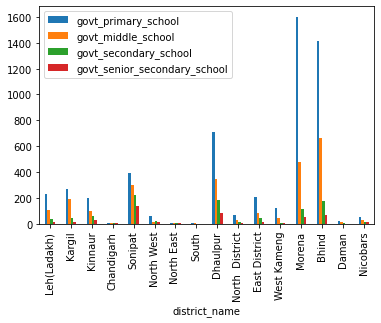

In [ ]:
village_with_less_ratio.plot(x="district_name", y=["govt_primary_school", "govt_middle_school","govt_secondary_school","govt_senior_secondary_school"], kind="bar")

NOW we can observe that the following district is having less sex ratio and little better primary education system. 

*   MORENA

*   BHIND
*   DHAULPUR


*   SONIPAT



---



---



---



---



---



Now doing same things in Town data

DATA TYPE

In [ ]:
town.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   state_code                                638 non-null    int64  
 1   state_name                                638 non-null    object 
 2   district_code                             638 non-null    int64  
 3   district_name                             638 non-null    object 
 4   total_households                          638 non-null    float64
 5   total_population                          638 non-null    int64  
 6   total_population_male                     638 non-null    float64
 7   total_population_female                   638 non-null    float64
 8   total_population_sc                       638 non-null    float64
 9   total_population_male_sc                  638 non-null    float64
 10  total_population_female_sc            

NULL CHECK

In [ ]:
town.isnull().sum()

state_code                                  0
state_name                                  0
district_code                               0
district_name                               0
total_households                            0
total_population                            0
total_population_male                       0
total_population_female                     0
total_population_sc                         0
total_population_male_sc                    0
total_population_female_sc                  0
total_population_st                         0
total_population_male_st                    0
total_population_female_st                  0
area_km                                     0
govt_primary_school                         0
pvt_primary_school                          0
govt_middle_school                          0
pvt_middle_school                           0
govt_secondary_school                       0
pvt_secondary_school                        0
govt_senior_secondary_school      

STATISTICS

In [ ]:
town.describe()

,state_code,district_code,total_households,total_population,total_population_male,total_population_female,total_population_sc,total_population_male_sc,total_population_female_sc,total_population_st,total_population_male_st,total_population_female_st,area_km,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_degree_college,pvt_art_degree_college,govt_science_college,pvt_science_college,govt_commerce_college,pvt_commerce_college,govt_art_science_degree_college,pvt_art_science_degree_college,govt_art_commerce_degree_college,pvt_art_commerce_degree_college,govt_art_science_commerce_degree_college,pvt_art_science_commerce_degree_college,govt_law_degree_college,pvt_law_degree_college,govt_university,pvt_university,govt_other_degree_college,pvt_other_degree_college,govt_medical_college,pvt_medical_college,govt_engineering_college,pvt_engineering_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_disabled_school,pvt_disabled_school
count,638.000000,638.000000,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.00000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,17.133229,320.115987,1.268369e+05,5.910176e+05,3.063199e+05,2.846011e+05,7.446387e+04,38752.719436,36209.117555,16384.974922,8274.714734,8110.260188,191.096823,127.774295,126.805643,68.659875,79.03605,39.963950,53.507837,24.402821,31.890282,1.579937,1.869906,1.043887,1.032915,0.731975,1.034483,1.067398,1.481191,1.075235,1.420063,4.399687,7.617555,0.479624,0.438871,0.360502,0.216301,0.579937,1.808777,0.474922,0.725705,0.515674,2.346395,0.484326,3.079937,1.401254,1.515674,1.145768,1.869906
std,9.392511,184.913682,2.358980e+05,1.042168e+06,5.478101e+05,4.944052e+05,1.318548e+05,69423.604702,63692.598154,31960.923955,16039.026420,15944.128884,404.286706,180.853573,183.072195,113.058960,141.11249,69.162587,105.697604,39.560289,59.953780,2.491878,4.633880,2.108059,2.996678,1.552416,3.143167,2.034283,3.966357,1.978848,3.555663,4.680881,15.879584,1.035656,1.424784,0.816898,1.048397,2.172839,9.953634,1.219349,2.583305,1.157423,6.280273,1.336214,11.389833,1.972049,4.445615,2.148872,4.223022
min,1.000000,0.000000,1.870000e+02,9.820000e+02,6.250000e+02,3.570000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,161.250000,2.271900e+04,1.102080e+05,5.857175e+04,5.309750e+04,1.118925e+04,5901.250000,5408.250000,767.000000,392.750000,360.750000,40.465000,34.000000,22.000000,15.000000,10.00000,9.000000,8.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,320.500000,5.502800e+04,2.770305e+05,1.449920e+05,1.339810e+05,3.686400e+04,18939.500000,18027.500000,5655.500000,2841.500000,2757.500000,86.282550,73.500000,73.500000,33.000000,39.00000,20.000000,26.000000,15.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0

OUTLIER TREATMENT

In [ ]:
area_town = town.index[town['area_km'] <1 ].tolist()
print(area_town)

[18, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 276, 284, 517]


In [ ]:
outlier_town = village.iloc[area_town]

In [ ]:
outlier_town.head()

,state_code,state_name,district_code,district_name,total_households,total_population,total_population_male,total_population_female,total_population_SC,total_population_male_SC,total_population_female_SC,total_population_ST,total_population_male_ST,total_population_female_ST,area_hectare,govt_pre_primary_school_UKG,pvt_pre_primary_school_UKG,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_science_degree_college,pvt_art_science_degree_college,govt_engineering_college,pvt_engineering_college,govt_medicine_college,pvt_medicine_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_vocational_ITI_training,pvt_vocational_ITI_training,govt_non_formal_training_centre,pvt_non_formal_training_centre,govt_disabled_school,pvt_disabled_school,govt_other_education,pvt_other_education
18,1.0,JAMMU & KASHMIR,19.0,Udhampur,78887.0,446777.0,232974.0,213803.0,122742.0,63846.0,58896.0,53636.0,27736.0,25900.0,233802.20,0.0,315.0,780.0,84.0,369.0,38.0,97.0,14.0,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,12.0,Arunachal Pradesh,245.0,Tawang,8377.0,38775.0,20792.0,17983.0,0.0,0.0,0.0,31105.0,15024.0,16081.0,1.00,78.0,3.0,106.0,7.0,50.0,4.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
243,12.0,Arunachal Pradesh,246.0,West Kameng,14069.0,68015.0,37809.0,30206.0,0.0,0.0,0.0,38846.0,19104.0,19742.0,35863.77,105.0,23.0,122.0,24.0,43.0,8.0,8.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,12.0,Arunachal Pradesh,247.0,East Kameng,10898.0,60340.0,29506.0,30834.0,0.0,0.0,0.0,57797.0,28146.0,29651.0,0.00,94.0,42.0,188.0,41.0,40.0,11.0,9.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,12.0,Arunachal Pradesh,248.0,Papum Pare,14245.0,79610.0,39935.0,39675.0,0.0,0.0,0.0,61451.0,29711.0,31740.0,2832.50,193.0,10.0,206.0,11.0,124.0,6.0,14.0,4.0,4.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<BarContainer object of 34 artists>

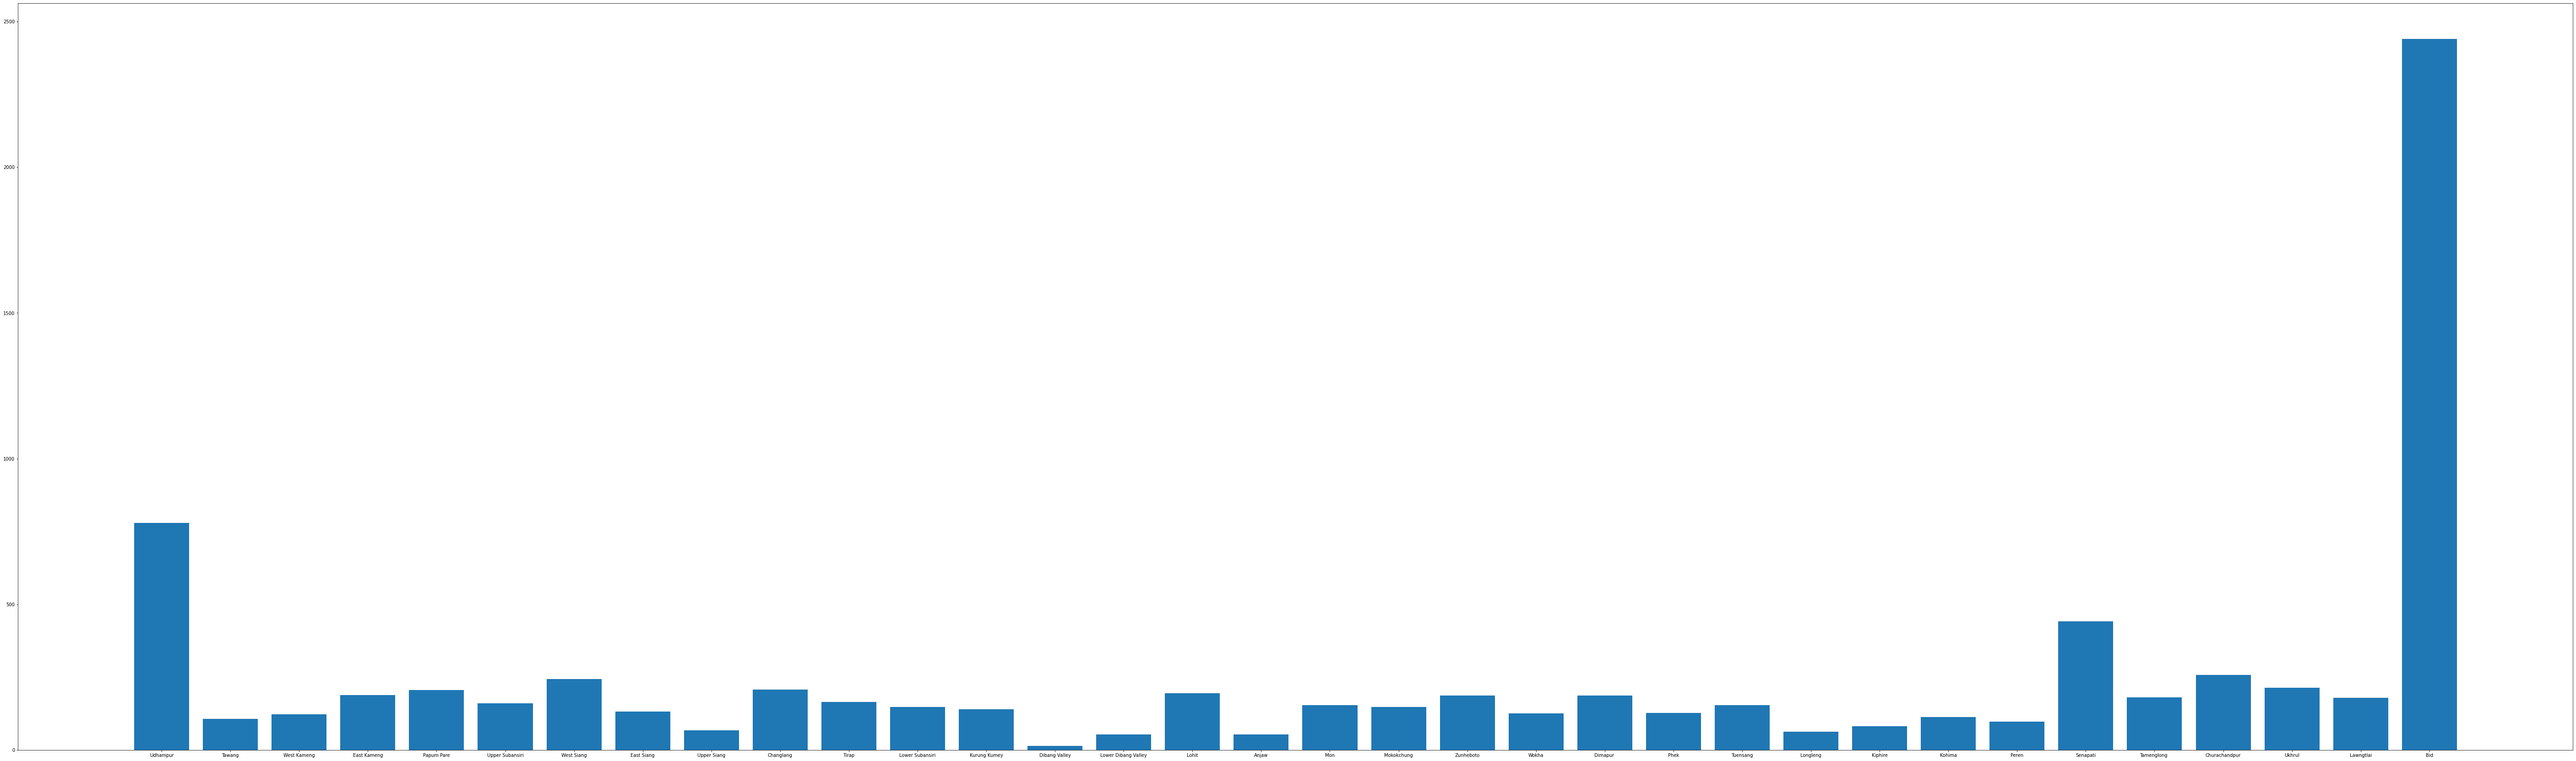

In [ ]:
ax= plt.subplots(figsize=(100,30))
plt.bar(outlier_town.district_name,outlier_town.govt_primary_school)

DROPPING OUTLIER

In [ ]:
town_WO= town.drop(area_town)

NOW OUR DATA IS GOOD TO GO

In [ ]:
town_WO.describe()

,state_code,district_code,total_households,total_population,total_population_male,total_population_female,total_population_sc,total_population_male_sc,total_population_female_sc,total_population_st,total_population_male_st,total_population_female_st,area_km,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_degree_college,pvt_art_degree_college,govt_science_college,pvt_science_college,govt_commerce_college,pvt_commerce_college,govt_art_science_degree_college,pvt_art_science_degree_college,govt_art_commerce_degree_college,pvt_art_commerce_degree_college,govt_art_science_commerce_degree_college,pvt_art_science_commerce_degree_college,govt_law_degree_college,pvt_law_degree_college,govt_university,pvt_university,govt_other_degree_college,pvt_other_degree_college,govt_medical_college,pvt_medical_college,govt_engineering_college,pvt_engineering_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_disabled_school,pvt_disabled_school
count,604.000000,604.00000,6.040000e+02,6.040000e+02,6.040000e+02,6.040000e+02,6.040000e+02,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,17.379139,323.42053,1.325143e+05,6.175289e+05,3.199089e+05,2.975179e+05,7.829067e+04,40749.003311,38067.655629,16192.751656,8190.149007,8002.602649,201.852886,133.721854,133.084437,71.473510,82.907285,41.592715,56.014901,25.531457,33.471854,1.635762,1.933775,1.082781,1.077815,0.754967,1.081126,1.117550,1.557947,1.122517,1.493377,4.612583,8.021523,0.501656,0.453642,0.359272,0.195364,0.612583,1.899007,0.493377,0.764901,0.524834,2.475166,0.503311,3.241722,1.466887,1.591060,1.197020,1.966887
std,9.563281,188.94969,2.397032e+05,1.057847e+06,5.559152e+05,5.019666e+05,1.342121e+05,70685.611805,64820.216958,32417.767262,16279.932140,16160.154678,412.903325,183.256036,186.009177,114.179636,144.004565,69.759357,107.973577,40.222482,61.199407,2.543117,4.728333,2.154043,3.071115,1.586497,3.221771,2.075944,4.061911,2.019365,3.639422,4.696307,16.222679,1.053304,1.443061,0.825624,0.981544,2.228767,10.222308,1.239867,2.649389,1.103761,6.430213,1.367105,11.684543,1.999311,4.552985,2.173851,4.316911
min,1.000000,0.00000,7.240000e+02,2.741000e+03,1.404000e+03,1.337000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,153.75000,2.674750e+04,1.342612e+05,6.994300e+04,6.399300e+04,1.495100e+04,7693.250000,7143.750000,612.250000,321.750000,297.000000,47.937500,39.000000,28.000000,17.000000,11.750000,10.000000,9.000000,8.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,336.50000,5.822100e+04,2.993145e+05,1.537835e+05,1.429175e+05,3.960450e+04,20099.500000,19209.500000,5123.000000,2701.500000,2505.000000,93.960000,78.000000,80.000000,36.000000,41.000000,21.000000,29.000000,15.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000

CALCULATING SEX RATIO

In [ ]:
sex_ratio_town= town_WO.total_population_female/town_WO.total_population_male
sex_ratio_town.describe()

count    604.000000
mean       0.928354
std        0.070855
min        0.494470
25%        0.894595
50%        0.926225
75%        0.966248
max        1.184402
dtype: float64

<BarContainer object of 604 artists>

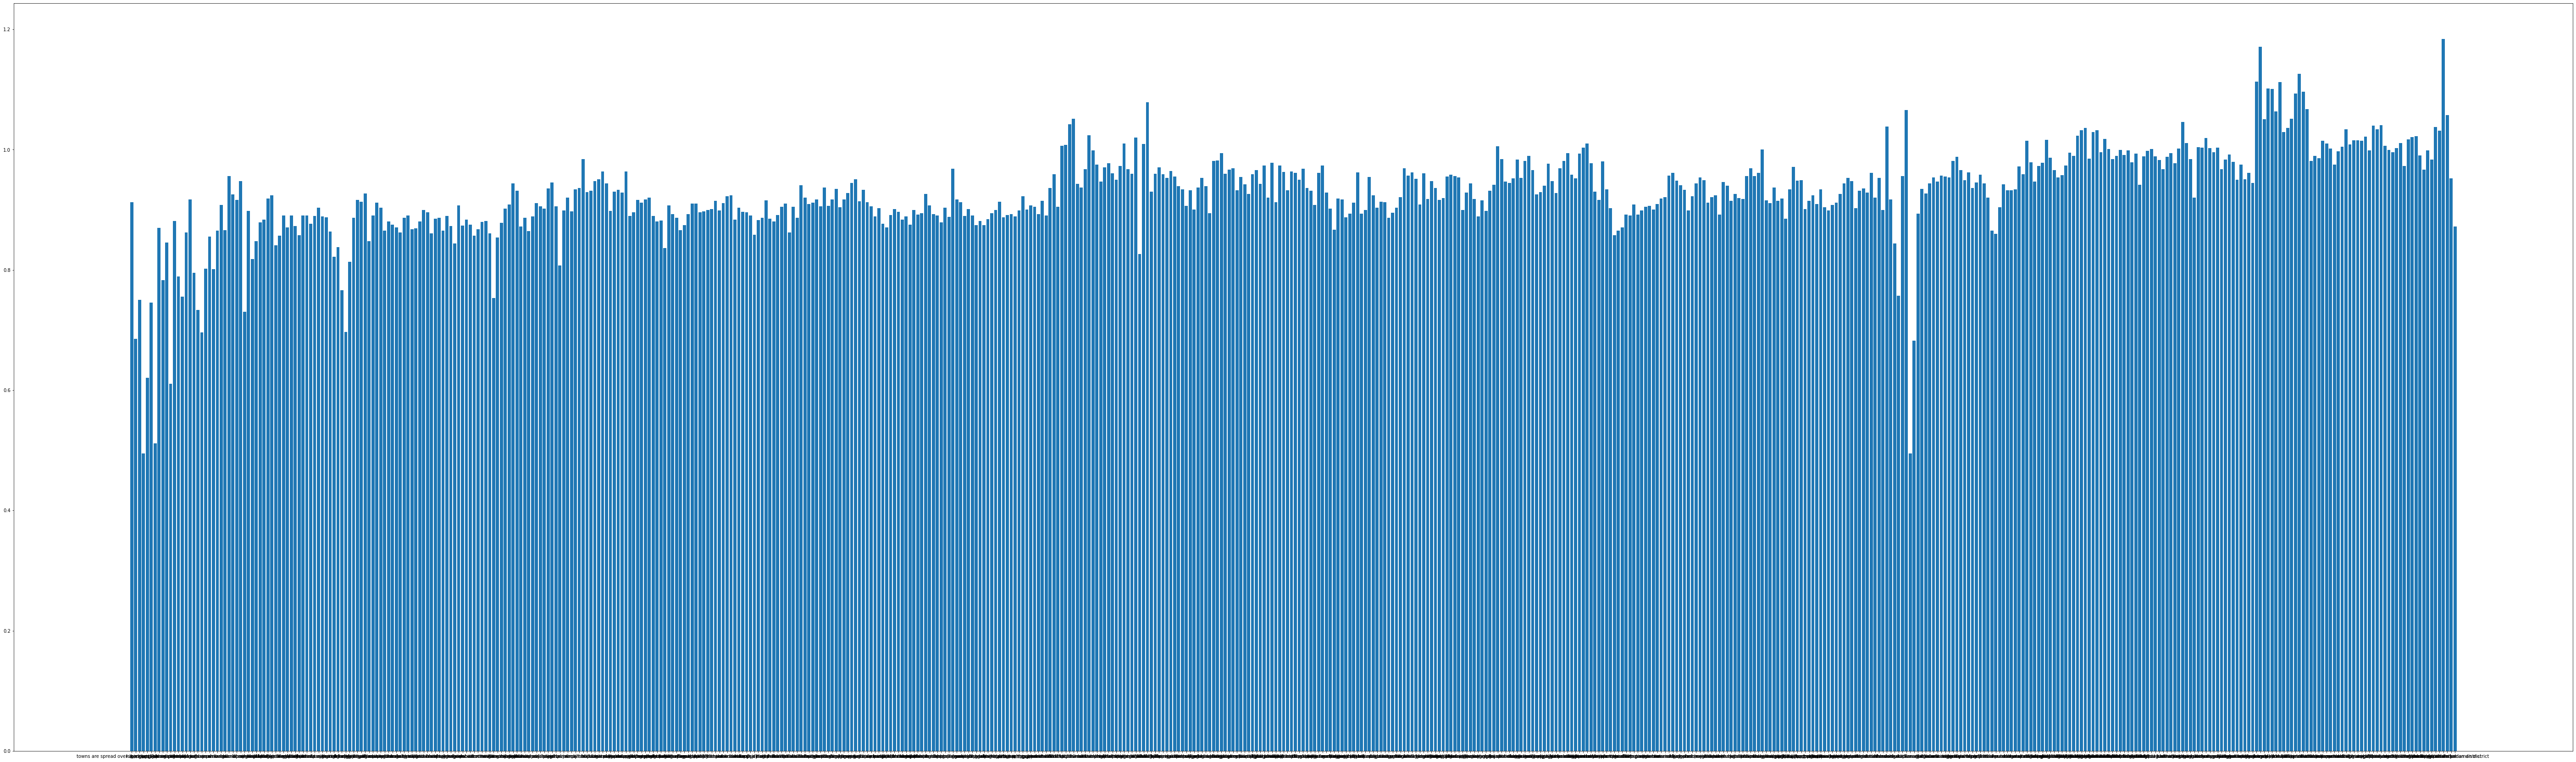

In [ ]:
ax= plt.subplots(figsize=(100,30))
plt.bar(town_WO.district_name,sex_ratio_town)

VISUALISING A THRESHOLD AS 0.85

In [ ]:
town_with_less_ratio = sex_ratio_town.index[sex_ratio_town <= 0.85].tolist()
print(town_with_less_ratio)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 16, 17, 19, 20, 22, 30, 32, 33, 38, 53, 54, 55, 56, 57, 62, 84, 94, 111, 138, 294, 489, 490, 493, 494]


In [ ]:
town_ratio = sex_ratio_town.iloc[town_with_less_ratio]
town_with_less_ratio1=town.iloc[town_with_less_ratio]
town_with_less_ratio1.head(12)

,state_code,state_name,district_code,district_name,total_households,total_population,total_population_male,total_population_female,total_population_sc,total_population_male_sc,total_population_female_sc,total_population_st,total_population_male_st,total_population_female_st,area_km,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_degree_college,pvt_art_degree_college,govt_science_college,pvt_science_college,govt_commerce_college,pvt_commerce_college,govt_art_science_degree_college,pvt_art_science_degree_college,govt_art_commerce_degree_college,pvt_art_commerce_degree_college,govt_art_science_commerce_degree_college,pvt_art_science_commerce_degree_college,govt_law_degree_college,pvt_law_degree_college,govt_university,pvt_university,govt_other_degree_college,pvt_other_degree_college,govt_medical_college,pvt_medical_college,govt_engineering_college,pvt_engineering_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_disabled_school,pvt_disabled_school
1,1,jammu & kashmir,1,kupwara,11999.0,104729,62152.0,42577.0,176.0,176.0,0.0,1861.0,1058.0,803.0,47.34,137.0,29.0,100.0,15.0,28.0,10.0,14.0,10.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,jammu & kashmir,2,badgam,10743.0,78360,44768.0,33592.0,282.0,265.0,17.0,203.0,150.0,53.0,43.68,45.0,18.0,30.0,19.0,13.0,9.0,13.0,5.0,5.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,jammu & kashmir,3,leh (ladakh),7004.0,45671,30560.0,15111.0,380.0,355.0,25.0,22068.0,11225.0,10843.0,24.01,7.0,6.0,8.0,5.0,6.0,5.0,7.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,jammu & kashmir,4,kargil,2191.0,16338,10082.0,6256.0,8.0,7.0,1.0,11496.0,5959.0,5537.0,2.14,8.0,7.0,8.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1,jammu & kashmir,5,punch,7216.0,38630,22125.0,16505.0,278.0,158.0,120.0,5090.0,2732.0,2358.0,24.08,13.0,4.0,10.0,11.0,2.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,jammu & kashmir,6,rajauri,7756.0,52314,34603.0,17711.0,2016.0,1263.0,753.0,3123.0,1716.0,1407.0,21.89,19.0,18.0,16.0,16.0,4.0,13.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,1,jammu & kashmir,8,baramula,27289.0,182500,102334.0,80166.0,1153.0,1147.0,6.0,1536.0,1090.0,446.0,63.56,147.0,45.0,59.0,28.0,20.0,13.0,10.0,2.0,6.0,3.0,5.0,3.0,5.0,3.0,5.0,3.0,5.0,3.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
9,1,jammu & kashmir,9,bandipore,9598.0,65361,35417.0,29944.0,287.0,270.0,17.0,859.0,499.0,360.0,49.63,30.0,7.0,17.0,21.0,4.0,2.0,5.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1,jammu & kashmir,10,srinagar,4836.0,32649,20266.0,12383.0,132.0,132.0,0.0,57.0,41.0,16.0,15.93,8.0,6.0,7.0,7.0,7.0,6.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1,jammu & kashmir,12,pulwama,10654.0,80462,44968.0,35494.0,350.0,349.0,1.0,418.0,309.0,109.0,38.55,95.0,11.0,45.0,28.0,22.0,26.0,11.0,9.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<BarContainer object of 35 artists>

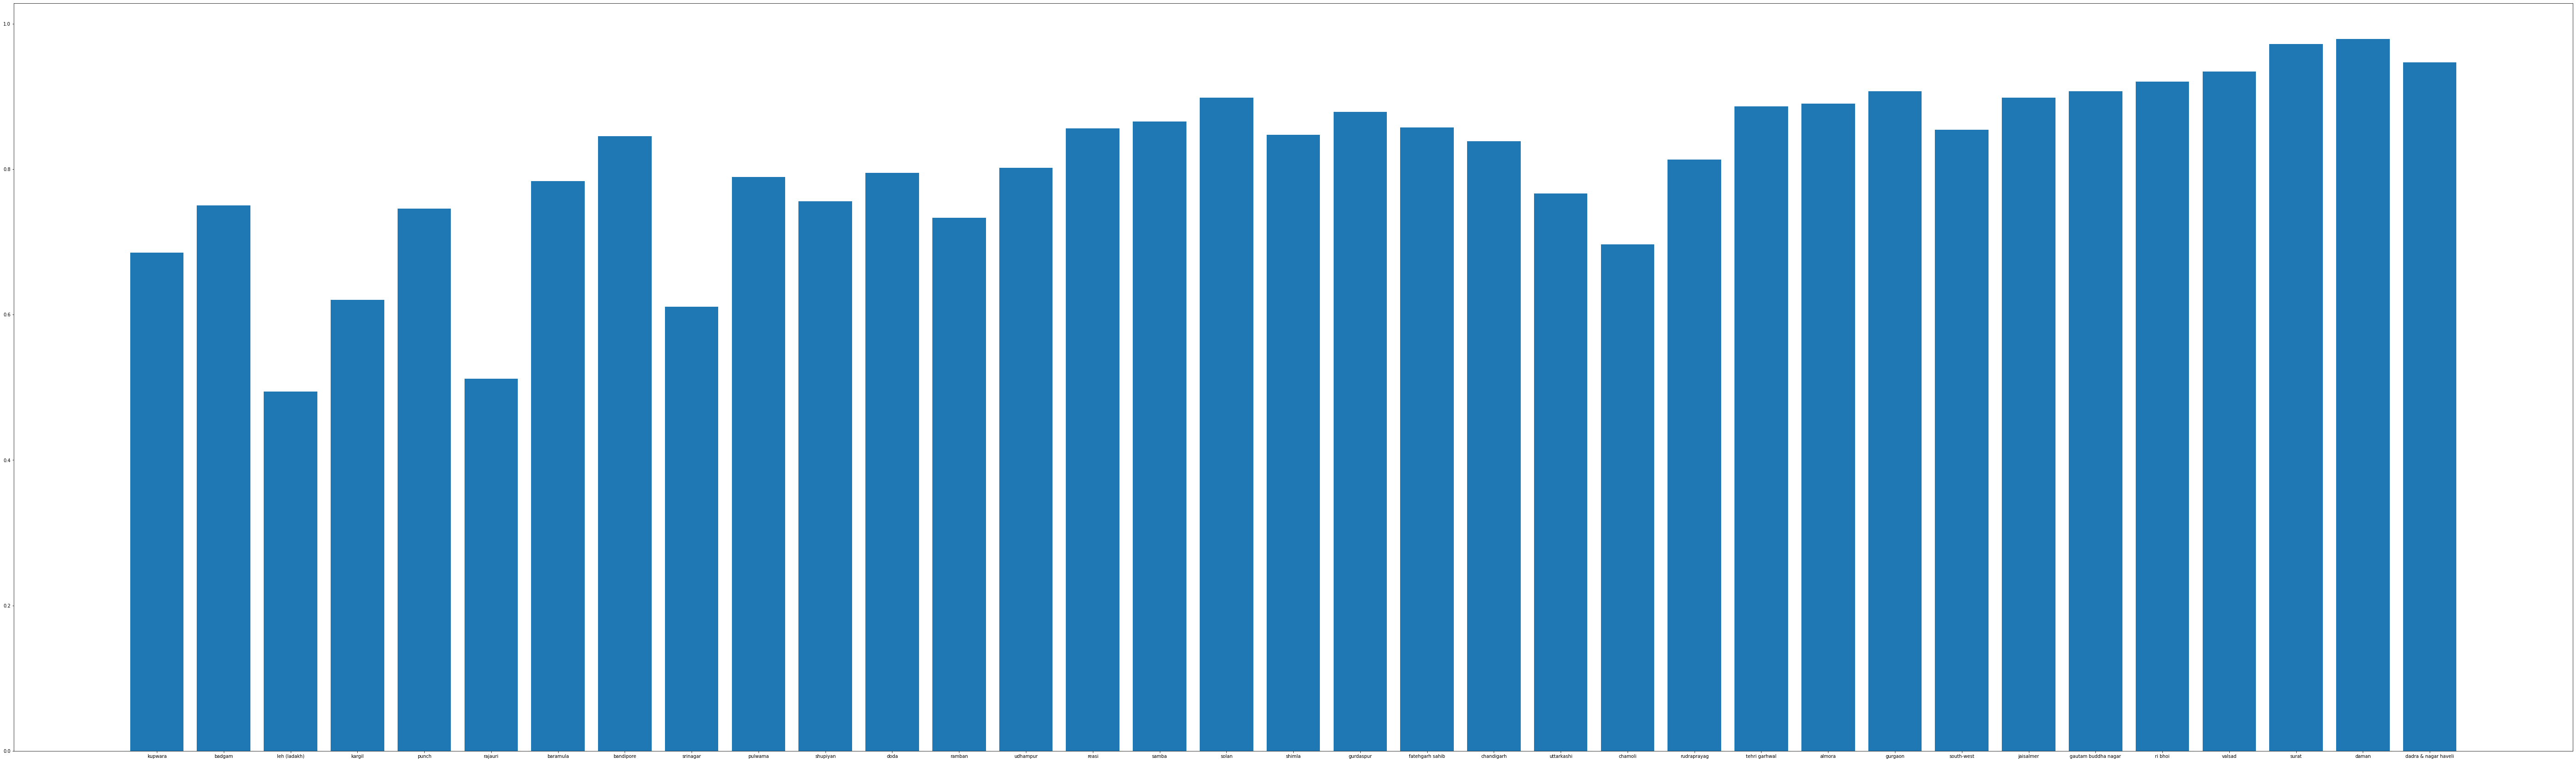

In [ ]:
ax= plt.subplots(figsize=(100,30))
plt.bar(town_with_less_ratio1.district_name,town_ratio)

From the graph we can figure out the districts having least sex ratio in town so our next districts to be selected will be..

DAMAN

LEH(LADAKH)

RAJAURI

SRINAGAR

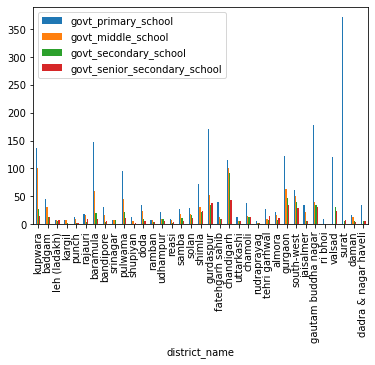

In [ ]:
town_with_less_ratio1.plot(x="district_name", y=["govt_primary_school", "govt_middle_school","govt_secondary_school","govt_senior_secondary_school"], kind="bar")

From the above graph representing educational facilities we are selecting our last two districts..

* CHANDIGARH
* KUPWARA

Finally 10 districts we should go for BETI BACHAO BETI PADHAO compaign are




MORENA

BHIND

DHAULPUR

SONIPAT

DAMAN

LEH(LADAKH)

RAJAURI

SRINAGAR

CHANDIGARH

KUPWARA



---



---



# CASE STUDY 2

CONNECTING TO GITHUB FOR FETCHING THE DATA

In [ ]:
!git clone https://github.com/utkarshraaz/DataScience.git


fatal: destination path 'DataScience' already exists and is not an empty directory.


IMPORTING USEFUL LIBRARIES

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

READING DATA USING PANDAS

In [ ]:
town= pd.read_csv('/content/DataScience/census_town_data_at_district_level_Explorin.csv')
print(town.shape)
town.head()

(638, 51)


,state_code,state_name,district_code,district_name,total_households,total_population,total_population_male,total_population_female,total_population_sc,total_population_male_sc,total_population_female_sc,total_population_st,total_population_male_st,total_population_female_st,area_km,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_degree_college,pvt_art_degree_college,govt_science_college,pvt_science_college,govt_commerce_college,pvt_commerce_college,govt_art_science_degree_college,pvt_art_science_degree_college,govt_art_commerce_degree_college,pvt_art_commerce_degree_college,govt_art_science_commerce_degree_college,pvt_art_science_commerce_degree_college,govt_law_degree_college,pvt_law_degree_college,govt_university,pvt_university,govt_other_degree_college,pvt_other_degree_college,govt_medical_college,pvt_medical_college,govt_engineering_college,pvt_engineering_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_disabled_school,pvt_disabled_school
0,1,jammu & kashmir,0,towns are spread over in more then one district.,204812.0,1357011,709542.0,647469.0,999.0,926.0,73.0,6743.0,3865.0,2878.0,316.31,243.0,72.0,242.0,239.0,65.0,203.0,34.0,32.0,11.0,2.0,10.0,2.0,10.0,2.0,10.0,2.0,10.0,2.0,10.0,2.0,3.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
1,1,jammu & kashmir,1,kupwara,11999.0,104729,62152.0,42577.0,176.0,176.0,0.0,1861.0,1058.0,803.0,47.34,137.0,29.0,100.0,15.0,28.0,10.0,14.0,10.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,jammu & kashmir,2,badgam,10743.0,78360,44768.0,33592.0,282.0,265.0,17.0,203.0,150.0,53.0,43.68,45.0,18.0,30.0,19.0,13.0,9.0,13.0,5.0,5.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,jammu & kashmir,3,leh (ladakh),7004.0,45671,30560.0,15111.0,380.0,355.0,25.0,22068.0,11225.0,10843.0,24.01,7.0,6.0,8.0,5.0,6.0,5.0,7.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,jammu & kashmir,4,kargil,2191.0,16338,10082.0,6256.0,8.0,7.0,1.0,11496.0,5959.0,5537.0,2.14,8.0,7.0,8.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


FETCING THE INFO OF THE DATA

In [ ]:
town.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   state_code                                638 non-null    int64  
 1   state_name                                638 non-null    object 
 2   district_code                             638 non-null    int64  
 3   district_name                             638 non-null    object 
 4   total_households                          638 non-null    float64
 5   total_population                          638 non-null    int64  
 6   total_population_male                     638 non-null    float64
 7   total_population_female                   638 non-null    float64
 8   total_population_sc                       638 non-null    float64
 9   total_population_male_sc                  638 non-null    float64
 10  total_population_female_sc            

CHECKING NULL VALUES

In [ ]:
town.isnull().sum()

state_code                                  0
state_name                                  0
district_code                               0
district_name                               0
total_households                            0
total_population                            0
total_population_male                       0
total_population_female                     0
total_population_sc                         0
total_population_male_sc                    0
total_population_female_sc                  0
total_population_st                         0
total_population_male_st                    0
total_population_female_st                  0
area_km                                     0
govt_primary_school                         0
pvt_primary_school                          0
govt_middle_school                          0
pvt_middle_school                           0
govt_secondary_school                       0
pvt_secondary_school                        0
govt_senior_secondary_school      

STATISTICS SUMMARY OF DATASET

In [ ]:
town.describe()

,state_code,district_code,total_households,total_population,total_population_male,total_population_female,total_population_sc,total_population_male_sc,total_population_female_sc,total_population_st,total_population_male_st,total_population_female_st,area_km,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_degree_college,pvt_art_degree_college,govt_science_college,pvt_science_college,govt_commerce_college,pvt_commerce_college,govt_art_science_degree_college,pvt_art_science_degree_college,govt_art_commerce_degree_college,pvt_art_commerce_degree_college,govt_art_science_commerce_degree_college,pvt_art_science_commerce_degree_college,govt_law_degree_college,pvt_law_degree_college,govt_university,pvt_university,govt_other_degree_college,pvt_other_degree_college,govt_medical_college,pvt_medical_college,govt_engineering_college,pvt_engineering_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_disabled_school,pvt_disabled_school
count,638.000000,638.000000,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.00000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,17.133229,320.115987,1.268369e+05,5.910176e+05,3.063199e+05,2.846011e+05,7.446387e+04,38752.719436,36209.117555,16384.974922,8274.714734,8110.260188,191.096823,127.774295,126.805643,68.659875,79.03605,39.963950,53.507837,24.402821,31.890282,1.579937,1.869906,1.043887,1.032915,0.731975,1.034483,1.067398,1.481191,1.075235,1.420063,4.399687,7.617555,0.479624,0.438871,0.360502,0.216301,0.579937,1.808777,0.474922,0.725705,0.515674,2.346395,0.484326,3.079937,1.401254,1.515674,1.145768,1.869906
std,9.392511,184.913682,2.358980e+05,1.042168e+06,5.478101e+05,4.944052e+05,1.318548e+05,69423.604702,63692.598154,31960.923955,16039.026420,15944.128884,404.286706,180.853573,183.072195,113.058960,141.11249,69.162587,105.697604,39.560289,59.953780,2.491878,4.633880,2.108059,2.996678,1.552416,3.143167,2.034283,3.966357,1.978848,3.555663,4.680881,15.879584,1.035656,1.424784,0.816898,1.048397,2.172839,9.953634,1.219349,2.583305,1.157423,6.280273,1.336214,11.389833,1.972049,4.445615,2.148872,4.223022
min,1.000000,0.000000,1.870000e+02,9.820000e+02,6.250000e+02,3.570000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,161.250000,2.271900e+04,1.102080e+05,5.857175e+04,5.309750e+04,1.118925e+04,5901.250000,5408.250000,767.000000,392.750000,360.750000,40.465000,34.000000,22.000000,15.000000,10.00000,9.000000,8.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,320.500000,5.502800e+04,2.770305e+05,1.449920e+05,1.339810e+05,3.686400e+04,18939.500000,18027.500000,5655.500000,2841.500000,2757.500000,86.282550,73.500000,73.500000,33.000000,39.00000,20.000000,26.000000,15.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0

REMOVING OUTLIER (SAME AS IN CASE STUDY ONE)

In [ ]:
area_town = town.index[town['area_km'] <1 ].tolist()
print(area_town)

[18, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 276, 284, 517]


In [ ]:
outlier_town = town.iloc[area_town]

In [ ]:
town_WO= town.drop(area_town)

NOW WE ARE GOING TO USE COSINE SIMILARITY TO FIND THE DISTRICT WHICH IS VERY MUCH SIMILAR TO A GIVEN DISTRICT.

LET THE GIVEN DISTRICT BE-

Gurgaon (state_code = 6 and district_code=86 in the dataset provided).

AS COSINE SIMALARITY USES DISTANCE FORMULA AMONG THE DATA SO DATA SHOULD BE NORMALISED.


In [ ]:
#NORMALIZATION

town_normalised = town_WO
for cols in town_WO.columns:
  if(town_WO[cols].dtype!='O'):
    town_normalised[cols] = town_WO[cols]/max(town_WO[cols])
town_normalised.head()

,state_code,state_name,district_code,district_name,total_households,total_population,total_population_male,total_population_female,total_population_sc,total_population_male_sc,total_population_female_sc,total_population_st,total_population_male_st,total_population_female_st,area_km,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_degree_college,pvt_art_degree_college,govt_science_college,pvt_science_college,govt_commerce_college,pvt_commerce_college,govt_art_science_degree_college,pvt_art_science_degree_college,govt_art_commerce_degree_college,pvt_art_commerce_degree_college,govt_art_science_commerce_degree_college,pvt_art_science_commerce_degree_college,govt_law_degree_college,pvt_law_degree_college,govt_university,pvt_university,govt_other_degree_college,pvt_other_degree_college,govt_medical_college,pvt_medical_college,govt_engineering_college,pvt_engineering_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_disabled_school,pvt_disabled_school
0,0.028571,jammu & kashmir,0.000000,towns are spread over in more then one district.,0.086558,0.120171,0.117818,0.122859,0.000559,0.000979,0.000087,0.023236,0.027237,0.019195,0.043929,0.146121,0.043347,0.200165,0.121135,0.096296,0.130128,0.055465,0.037209,0.611111,0.042553,0.434783,0.0625,0.769231,0.060606,0.476190,0.041667,0.6250,0.0625,0.294118,0.010101,0.272727,0.086957,0.333333,0.0,0.071429,0.0,0.153846,0.0,0.142857,0.016129,0.1,0.009009,0.214286,0.012658,0.045455,0.033333
1,0.028571,jammu & kashmir,0.001563,kupwara,0.005071,0.009274,0.010320,0.008079,0.000098,0.000186,0.000000,0.006413,0.007456,0.005356,0.006574,0.082381,0.017459,0.082713,0.007603,0.041481,0.006410,0.022838,0.011628,0.055556,0.000000,0.043478,0.0000,0.076923,0.000000,0.047619,0.000000,0.0625,0.0000,0.029412,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.028571,jammu & kashmir,0.003125,badgam,0.004540,0.006939,0.007434,0.006374,0.000158,0.000280,0.000020,0.000700,0.001057,0.000353,0.006066,0.027060,0.010837,0.024814,0.009630,0.019259,0.005769,0.021207,0.005814,0.277778,0.000000,0.043478,0.0000,0.076923,0.000000,0.047619,0.000000,0.0625,0.0000,0.029412,0.000000,0.000000,0.000000,0.000000,0.0,0.035714,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.071429,0.000000,0.000000,0.000000
3,0.028571,jammu & kashmir,0.004687,leh (ladakh),0.002960,0.004044,0.005074,0.002867,0.000212,0.000375,0.000030,0.076044,0.079103,0.072320,0.003334,0.004209,0.003612,0.006617,0.002534,0.008889,0.003205,0.011419,0.002326,0.055556,0.000000,0.043478,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.028571,jammu & kashmir,0.006250,kargil,0.000926,0.001447,0.001674,0.001187,0.000004,0.000007,0.000001,0.039614,0.041993,0.036930,0.000297,0.004811,0.004214,0.006617,0.000507,0.002963,0.001282,0.001631,0.000000,0.055556,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016667


GIVEN DISTRICT

In [ ]:
town.loc[town['district_code'] ==86,:]

,state_code,state_name,district_code,district_name,total_households,total_population,total_population_male,total_population_female,total_population_sc,total_population_male_sc,total_population_female_sc,total_population_st,total_population_male_st,total_population_female_st,area_km,govt_primary_school,pvt_primary_school,govt_middle_school,pvt_middle_school,govt_secondary_school,pvt_secondary_school,govt_senior_secondary_school,pvt_senior_secondary_school,govt_art_degree_college,pvt_art_degree_college,govt_science_college,pvt_science_college,govt_commerce_college,pvt_commerce_college,govt_art_science_degree_college,pvt_art_science_degree_college,govt_art_commerce_degree_college,pvt_art_commerce_degree_college,govt_art_science_commerce_degree_college,pvt_art_science_commerce_degree_college,govt_law_degree_college,pvt_law_degree_college,govt_university,pvt_university,govt_other_degree_college,pvt_other_degree_college,govt_medical_college,pvt_medical_college,govt_engineering_college,pvt_engineering_college,govt_management_college,pvt_management_college,govt_polytechnic_college,pvt_polytechnic_college,govt_disabled_school,pvt_disabled_school
84,6,haryana,86,gurgaon,237750.0,1042253,565228.0,477025.0,107824.0,57083.0,50741.0,0.0,0.0,0.0,281.35,122.0,173.0,64.0,155.0,47.0,102.0,35.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,1.0,0.0,2.0,1.0


CONVERTING USEFUL FEATURES TO AN ARRAY USING NUMPY.

In [ ]:
gurgaon =town_normalised.iloc[84,:]
gurgaon =gurgaon.drop(['state_code','district_code','state_name','district_name'])
gurgaon= np.array(gurgaon)

In [ ]:
gurgaon

array([0.00858136021215675, 0.01099026438942159, 0.010805746792241102,
       0.011201123641771255, 0.010071793610145041, 0.009971231342928525,
       0.010184669828954036, 0.0, 0.0, 0.0, 0.009067360391258892,
       0.013830426939266387, 0.025285972305839857, 0.016542597187758478,
       0.016725798276735936, 0.022222222222222223, 0.015384615384615385,
       0.01468189233278956, 0.01627906976744186, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.08823529411764706, 0.010101010101010102,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016129032258064516,
       0.0, 0.0, 0.07142857142857142, 0.0, 0.0, 0.016666666666666666],
      dtype=object)

In [ ]:
import math
l1=0
for x in gurgaon:
    l1+=x*x
l1 = math.sqrt(l1)

Defining cos(theta) function

In [ ]:

def costheta(b):
  l2=0
  for x in b:
    l2+=x*x
  l2 = math.sqrt(l2)
  return np.sum(gurgaon*b)/(l1*l2)


Converting each row into array and calculating cos theta, then store it in theta_values array

In [ ]:
theta_values =[]
for i in town_normalised.index:
    vals =town_normalised.iloc[town_normalised.index==i]
    vals =vals.drop(['state_code','district_code','state_name','district_name'],axis=1)
    vals = np.array(vals)
    vals=vals.reshape(vals.shape[1])
    costhetavalue = costheta(vals)
    theta_values.append(costhetavalue)

In [ ]:
thetavalues=pd.Series(theta_values, index = town_normalised.index)
thetavalues.columns=['theta']

In [ ]:
thetavalues

0      0.308050
1      0.314073
2      0.245695
3      0.048365
4      0.062599
         ...   
633    0.611108
634    0.551772
635    0.663572
636    0.723989
637    0.631976
Length: 604, dtype: float64

In [ ]:
thetavalues = thetavalues.sort_values(ascending=False)
thetavalues.head(15)

85     1.000000
68     0.950759
533    0.942956
82     0.934615
31     0.933596
23     0.932334
75     0.924486
112    0.919812
29     0.912552
81     0.906156
79     0.893202
536    0.887414
123    0.886590
120    0.883697
404    0.883622
dtype: float64

In [ ]:
for i in range(10):
  print(town_normalised['district_name'].iloc[town_normalised.index == thetavalues.index[i]].values)

['mewat']
['ambala']
['medak district']
['mahendragarh']
['sirmaur']
['chamba']
['jind']
['barmer']
['bilaspur']
['jhajjar']


So using cosine similarity we found that these towns are very much similar to the given town.

*  Mewat
*  Ambala
*  Medak
*  Mahendragarh
*  Sirmaur
*  Chamba
*  Jind
*  Barmer
*  Bilaspur
*  Jhajjar